In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1]:
# ts1 = pd.read_csv('jagalur_hourlyv3.csv')
# ts1['time']= pd.to_datetime(ts1['time'])
# ts1['Values']=ts1['Values']*4
# rolmean = ts1['Values'].rolling(window=720).mean()
# rolstd = ts1['Values'].rolling(window=720).std()

# #g = sns.lineplot(data=rolmean)
# g = sns.lineplot(data=ts1['Values'])
# g.set(ylim=(0, 400))

### Testing the dataset for stationarity

In [23]:
tempdf=ts1.reset_index()
tempdf=tempdf.resample("D",on='time').Values.sum()          #resampling the hourly data as day-wise
tempdf.colums=['Values']

mean_gen = tempdf.mean(skipna=True)
tempdf=tempdf.mask(tempdf == 0,mean_gen)
tempdf

time
2014-01-01    4654.640
2014-01-02    5026.588
2014-01-03    5195.280
2014-01-04    5585.448
2014-01-05    3508.112
                ...   
2014-12-27    5300.208
2014-12-28    3837.536
2014-12-29    3024.068
2014-12-30    5245.108
2014-12-31    5372.448
Freq: D, Name: Values, Length: 365, dtype: float64

Mean istime
2014-01-01            NaN
2014-01-02            NaN
2014-01-03            NaN
2014-01-04            NaN
2014-01-05            NaN
                 ...     
2014-12-27    4168.016933
2014-12-28    4201.554800
2014-12-29    4184.997467
2014-12-30    4240.233333
2014-12-31    4255.086400
Freq: D, Name: Values, Length: 365, dtype: float64


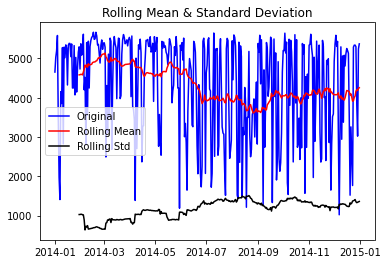

ADF Statistic: -13.548132607769483
p-value: 2.4388770970713854e-25
Critical Values:
	1%: -3.4484434475193777
	5%: -2.869513170510808
	10%: -2.571017574266393


In [81]:
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=30).mean()
    rolling_std = timeseries.rolling(window=30).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    print("Mean is" + str(rolling_mean))
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries.values)
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))
get_stationarity(tempdf)

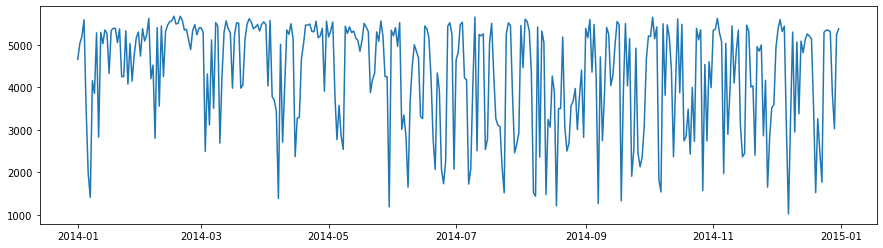

In [24]:
plt.figure(figsize=(15,4))
plt.plot(tempdf.index,tempdf.values)

In [25]:
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
series = tempdf
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -13.548133
p-value: 0.000000
Critical Values:
	1%: -3.448
	5%: -2.870
	10%: -2.571


### Decomposing the data into trend, seasonality and residual

<ipython-input-31-06a99e01e6df>:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(tempdf, model='additive', freq=30)


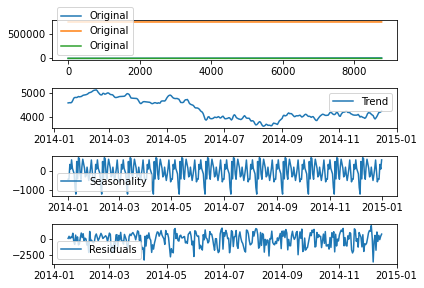

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
decomposition = seasonal_decompose(tempdf, model='additive', freq=30)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts1, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

# decomposedData= residual
# decomposedData.dropna(inplace = True)
# test_stationarity(decomposedData)

Text(0.5, 1.0, 'Detrended by subtracting the least squares fit')

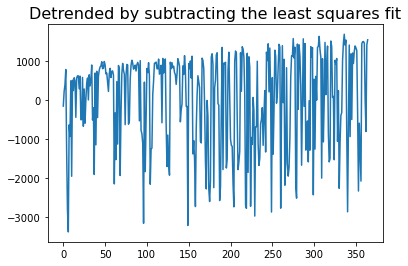

In [80]:
from scipy import signal
detrended = signal.detrend(tempdf.values)
plt.plot(detrended)
plt.title('Detrended by subtracting the least squares fit', fontsize=16)

#### Determining ACF and PACF

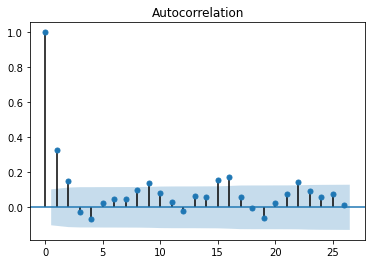

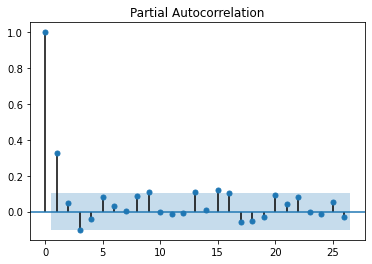

In [51]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
series = tempdf
plot_acf(series)
plot_pacf(series)
pyplot.show()

c:\users\saksh\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Text(0.5, 1.0, 'Plotting AR model')

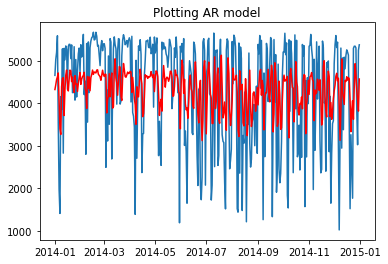

In [82]:
from statsmodels.tsa.arima_model import ARIMA

#AR model
model = ARIMA(tempdf, order=(6,0,0))
results_AR = model.fit(disp=-1)
plt.plot(tempdf)
plt.plot(results_AR.fittedvalues, color='red')
#plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-tempdf)**2))
plt.title('Plotting AR model')

Text(0.5, 1.0, 'Plotting MA model')

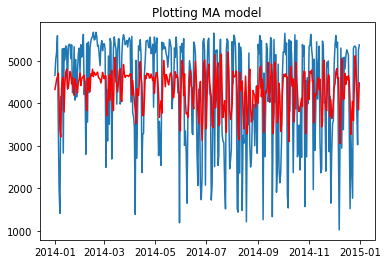

In [84]:
#MA model
model = ARIMA(tempdf, order=(0,0,5))
results_MA = model.fit(disp=-1)
plt.plot(tempdf)
plt.plot(results_MA.fittedvalues, color='red')
#plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-tempdf)**2))
plt.title('Plotting MA model')

c:\users\saksh\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:                 Values   No. Observations:                  365
Model:                     ARMA(6, 5)   Log Likelihood               -3085.195
Method:                       css-mle   S.D. of innovations           1132.237
Date:                Wed, 18 Nov 2020   AIC                           6196.390
Time:                        01:17:08   BIC                           6247.088
Sample:                    01-01-2014   HQIC                          6216.538
                         - 12-31-2014                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4338.9992    218.498     19.858      0.000    3910.751    4767.248
ar.L1.Values     0.8901      0.192      4.640      0.000       0.514       1.266
ar.L2.Values     0.3814      0.176      2.16

Text(0.5, 1.0, 'Plotting ARIMA model')

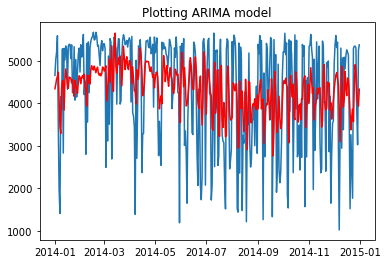

In [100]:
model = ARIMA(tempdf, order = (6,0,5))
results_ARIMA = model.fit(disp = -1)
plt.plot(tempdf)
plt.plot(results_ARIMA.fittedvalues, color='red')
print(results_ARIMA.summary())
#plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-tempdf)**2))
plt.title('Plotting ARIMA model')

In [78]:
predictions_ARIMA = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA.head())

time
2014-01-01    4338.999221
2014-01-02    4439.585017
2014-01-03    4563.894781
2014-01-04    4631.507588
2014-01-05    4728.038168
Freq: D, dtype: float64


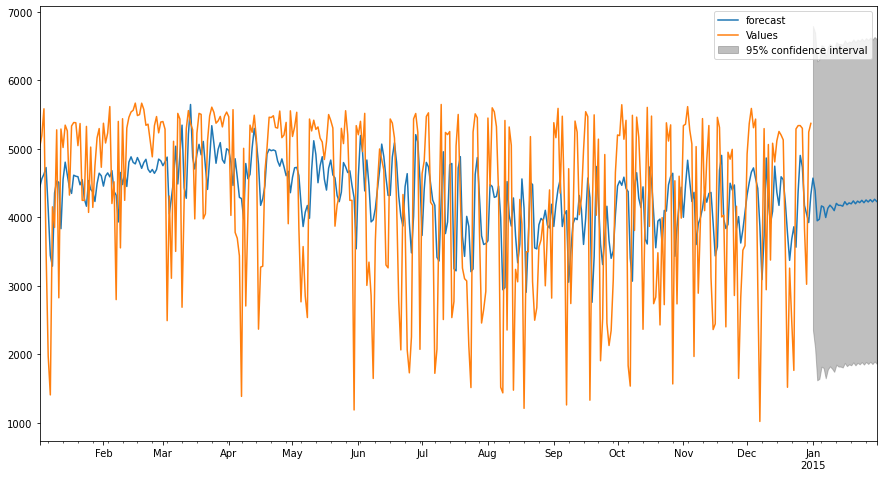

In [101]:
# fig= plt.figure()
fig, ax = plt.subplots(figsize=(15,8))
results_ARIMA.plot_predict(1,395, ax=ax)
x=results_ARIMA.forecast(steps=30)
plt.show()

# ax = dta.loc['1950':].plot(ax=ax)

### End of Notebook